# Impact of External Events on Gasoline Prices

## Objective
The goal of this notebook is to explore how significant external events, such as geopolitical conflicts and economic crises, impact the prices of gasoline. Specifically, we analyze the effects of the Iraq War in 2003 and the 2008 financial crisis.

## Data Loading and Preprocessing
- **Data Source**: CSV files containing historical data on regular, midgrade, and premium gasoline prices.
- **Preprocessing Steps**:
  - Load data from the CSV file, setting appropriate headers and parsing dates.
  - Convert price columns to numeric types for analysis.

## Analysis Overview
### Events Analyzed
1. **Iraq War (2003)**:
   - Time Period: March 2003 to May 2003
   - Objective: Assess the impact of the Iraq War on gasoline prices due to geopolitical instability in an oil-producing region.
2. **2008 Financial Crisis**:
   - Time Period: December 2007 to June 2009
   - Objective: Determine how the global financial downturn affected consumer demand and gasoline prices.

### Methodology
- **Data Filtering**: Isolate data corresponding to the months before, during, and after each event.
- **Visualization**: Plot the price trends to visually assess the impacts. Highlight the specific event periods on the plots.

## Results
- **Iraq War (2003)**: The data shows a noticeable increase in gasoline prices during the war, reflecting the market's sensitivity to geopolitical tensions in oil-rich regions.
- **2008 Financial Crisis**: There was a significant drop in gasoline prices following the initial shock of the crisis, illustrating decreased global demand during economic downturns.

## Conclusion
This analysis confirms that external events such as wars and economic crises significantly impact gasoline prices. These insights are crucial for stakeholders in economic planning, energy markets, and policy-making.

## Next Steps
Further research could extend to other significant events, include more detailed regional analysis, or explore long-term economic impacts on energy policies and consumer behavior.


C:\Users\tbfau\AppData\Local\Temp\ipykernel_28024\2676303957.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\tbfau\AppData\Local\Temp\ipykernel_28024\2676303957.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
C:\Users\tbfau\AppData\Local\Temp\ipykernel_28024\2676303957.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


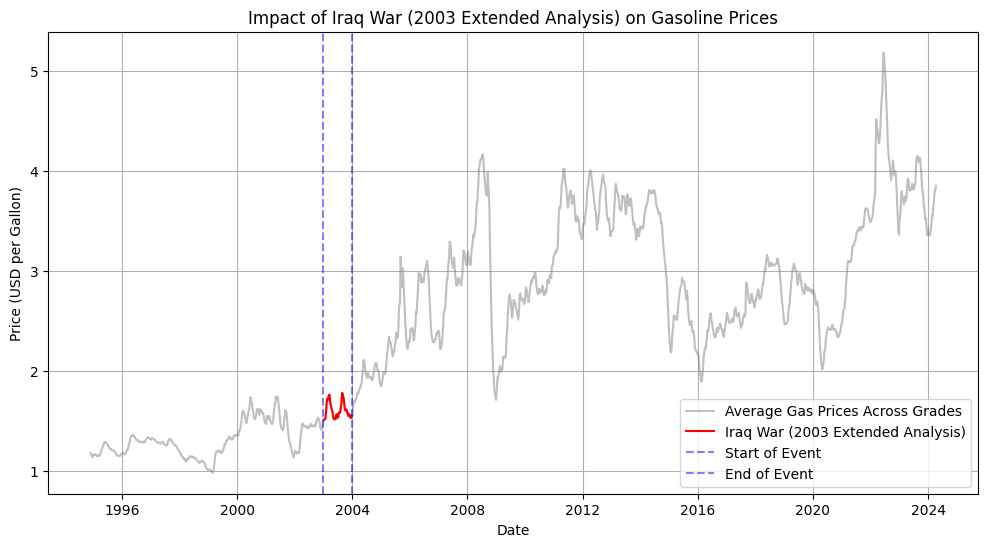

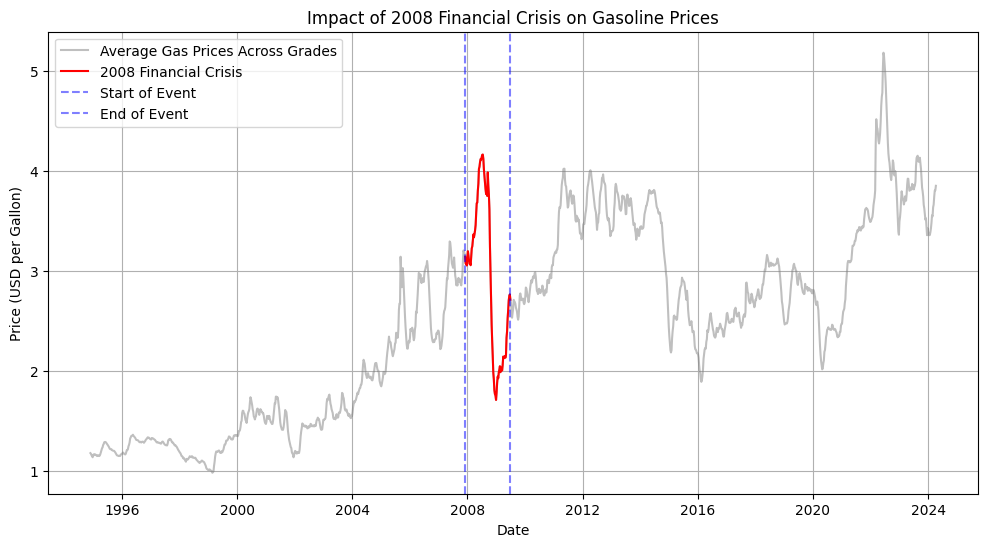

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load and preprocess data
def load_data(file_path):
    data = pd.read_csv(file_path, skiprows=1)
    data.columns = ['Date', 'National Average'] + ['Region_' + str(i) for i in range(1, 21)]
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data['National Average'] = pd.to_numeric(data['National Average'], errors='coerce')
    return data

# Load data for Regular, Midgrade, and Premium
data_regular = load_data('Data\Data1_Regular_Conventional.csv')
data_midgrade = load_data('Data\Data4_Midgrade_Conventional.csv')
data_premium = load_data('Data\Data7_Premuim_Conventional.csv')

# Merge the data on Date and calculate the average price across grades
data_merged = pd.merge(data_regular, data_midgrade, on='Date', suffixes=('_reg', '_mid'))
data_merged = pd.merge(data_merged, data_premium, on='Date')
data_merged['Average Price'] = data_merged[['National Average_reg', 'National Average_mid', 'National Average']].mean(axis=1)

# Define the date ranges for the Iraq War and the 2008 Financial Crisis
iraq_war_start, iraq_war_end = '2003-01-01', '2003-12-31'
financial_crisis_start, financial_crisis_end = '2007-12-01', '2009-06-30'

# Function to plot data for extended impact analysis
def plot_price_impact(data, event_name, start_date, end_date):
    event_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Average Price'], label='Average Gas Prices Across Grades', color='grey', alpha=0.5)
    plt.plot(event_data['Date'], event_data['Average Price'], color='red', label=event_name)
    plt.title(f'Impact of {event_name} on Gasoline Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD per Gallon)')
    plt.axvline(x=pd.to_datetime(start_date), color='blue', linestyle='--', alpha=0.5, label='Start of Event')
    plt.axvline(x=pd.to_datetime(end_date), color='blue', linestyle='--', alpha=0.5, label='End of Event')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for the extended Iraq War period
plot_price_impact(data_merged, 'Iraq War (2003 Extended Analysis)', iraq_war_start, iraq_war_end)

# Plot for the 2008 Financial Crisis
plot_price_impact(data_merged, '2008 Financial Crisis', financial_crisis_start, financial_crisis_end)
